In [20]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 1. Perceptron Implementation

### AND, OR, and XOR Operations

In [21]:
# Create TensorFlow perceptron models for logical operations
def create_perceptron(name):
    """Create a simple perceptron using TensorFlow"""
    model = keras.Sequential([
        layers.Dense(1, activation='sigmoid', input_shape=(2,))
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [22]:
# Test data for logical operations
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)

# AND operation
y_and = np.array([0, 0, 0, 1], dtype=np.float32)
perceptron_and = create_perceptron('AND')
perceptron_and.fit(X, y_and, epochs=1000, verbose=0)
predictions_and = (perceptron_and.predict(X, verbose=0) > 0.5).astype(int).flatten()

# OR operation  
y_or = np.array([0, 1, 1, 1], dtype=np.float32)
perceptron_or = create_perceptron('OR')
perceptron_or.fit(X, y_or, epochs=1000, verbose=0)
predictions_or = (perceptron_or.predict(X, verbose=0) > 0.5).astype(int).flatten()

# XOR operation (This will not work with single perceptron)
y_xor = np.array([0, 1, 1, 0], dtype=np.float32)
perceptron_xor = create_perceptron('XOR')
perceptron_xor.fit(X, y_xor, epochs=1000, verbose=0)
predictions_xor = (perceptron_xor.predict(X, verbose=0) > 0.5).astype(int).flatten()

/Users/shreyjain/Documents/CODING/MCA-Assignments/Trimester-5/nndl/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Display results
results_df = pd.DataFrame({
    'Input1': X[:, 0],
    'Input2': X[:, 1],
    'AND_Expected': y_and,
    'AND_Predicted': predictions_and,
    'OR_Expected': y_or,
    'OR_Predicted': predictions_or,
    'XOR_Expected': y_xor,
    'XOR_Predicted': predictions_xor
})

results_df

,Input1,Input2,AND_Expected,AND_Predicted,OR_Expected,OR_Predicted,XOR_Expected,XOR_Predicted
0,0.0,0.0,0.0,0,0.0,1,0.0,1
1,0.0,1.0,0.0,0,1.0,1,1.0,1
2,1.0,0.0,0.0,1,1.0,1,1.0,0
3,1.0,1.0,1.0,0,1.0,1,0.0,0


## 2. Activation Functions from Scratch

In [24]:
# Activation Functions Implementation

def unit_step(x):
    """Unit Step Function"""
    return np.where(x >= 0, 1, 0)

def sign_signum(x):
    """Sign/Signum Function"""
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

def linear_function(x):
    """Linear Function"""
    return x

def piece_wise_linear(x):
    """Piece-wise Linear Function"""
    return np.where(x < -1, 0, np.where(x > 1, 1, (x + 1) / 2))

def sigmoid(x):
    """Sigmoid/Logistic Function"""
    x_clipped = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x_clipped))

def tanh(x):
    """Hyperbolic Tangent Function"""
    x_clipped = np.clip(x, -500, 500)
    return (np.exp(x_clipped) - np.exp(-x_clipped)) / (np.exp(x_clipped) + np.exp(-x_clipped))

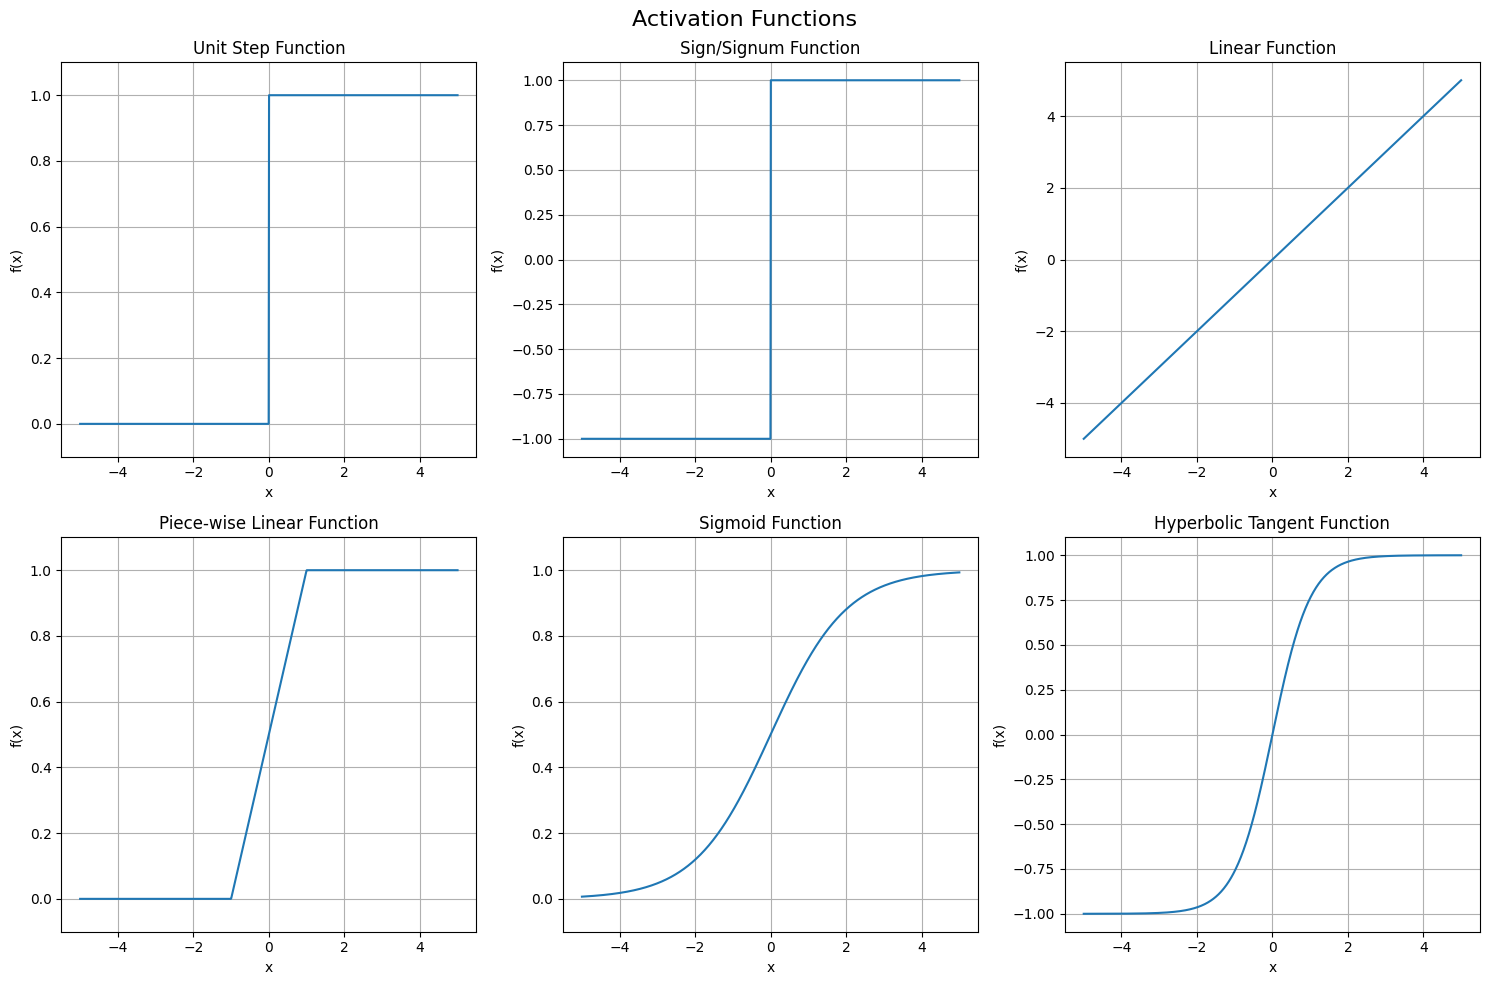

In [36]:
# Generate x values for plotting
x_values = np.linspace(-5, 5, 1000)

# Calculate y values for each activation function
y_unit_step = unit_step(x_values)
y_sign_signum = sign_signum(x_values)
y_linear = linear_function(x_values)
y_piece_wise = piece_wise_linear(x_values)
y_sigmoid = sigmoid(x_values)
y_tanh = tanh(x_values)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Activation Functions', fontsize=16)

# Unit Step Function
axes[0, 0].plot(x_values, y_unit_step)
axes[0, 0].set_title('Unit Step Function')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].grid(True)
axes[0, 0].set_ylim(-0.1, 1.1)

# Sign/Signum Function
axes[0, 1].plot(x_values, y_sign_signum)
axes[0, 1].set_title('Sign/Signum Function')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('f(x)')
axes[0, 1].grid(True)
axes[0, 1].set_ylim(-1.1, 1.1)

# Linear Function
axes[0, 2].plot(x_values, y_linear)
axes[0, 2].set_title('Linear Function')
axes[0, 2].set_xlabel('x')
axes[0, 2].set_ylabel('f(x)')
axes[0, 2].grid(True)

# Piece-wise Linear Function
axes[1, 0].plot(x_values, y_piece_wise)
axes[1, 0].set_title('Piece-wise Linear Function')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].grid(True)
axes[1, 0].set_ylim(-0.1, 1.1)

# Sigmoid Function
axes[1, 1].plot(x_values, y_sigmoid)
axes[1, 1].set_title('Sigmoid Function')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('f(x)')
axes[1, 1].grid(True)
axes[1, 1].set_ylim(-0.1, 1.1)

# Hyperbolic Tangent Function
axes[1, 2].plot(x_values, y_tanh)
axes[1, 2].set_title('Hyperbolic Tangent Function')
axes[1, 2].set_xlabel('x')
axes[1, 2].set_ylabel('f(x)')
axes[1, 2].grid(True)
axes[1, 2].set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.show()

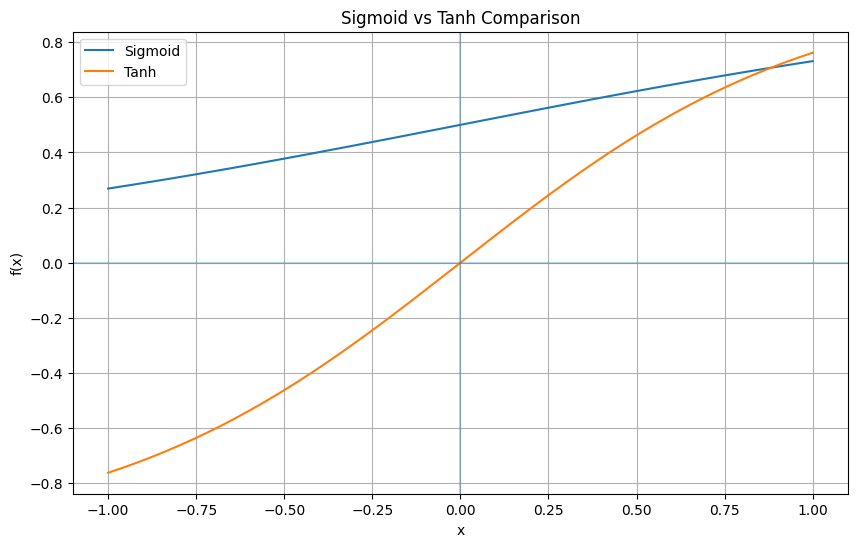

In [26]:
# Detailed comparison of Sigmoid and Tanh
x_comparison = np.linspace(-1, 1, 50)
y_sigmoid_comp = sigmoid(x_comparison)
y_tanh_comp = tanh(x_comparison)

plt.figure(figsize=(10, 6))
plt.plot(x_comparison, y_sigmoid_comp, label='Sigmoid')
plt.plot(x_comparison, y_tanh_comp, label='Tanh')
plt.title('Sigmoid vs Tanh Comparison')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.axhline(y=0, alpha=0.3)
plt.axvline(x=0, alpha=0.3)
plt.show()

### Analysis: Sigmoid vs Tanh Output Ranges

**Sigmoid Function:**
- Output range: (0, 1)
- Always positive
- Asymptotes at 0 and 1
- Commonly used in binary classification

**Hyperbolic Tangent (Tanh) Function:**
- Output range: (-1, 1) 
- Zero-centered (symmetric around origin)
- Asymptotes at -1 and 1
- Often preferred over sigmoid in hidden layers

**Similarities:**
- Both are S-shaped (sigmoidal) curves
- Both are differentiable everywhere
- Both have saturating regions (flat areas at extremes)
- Both are monotonic functions

**Differences:**
- Tanh is zero-centered while sigmoid is not
- Tanh has twice the range of sigmoid
- Tanh convergence is often faster due to zero-centering
- Sigmoid is better for output layers in binary classification

## 3. Banknote Authentication Dataset

In [27]:
# Load the banknote authentication dataset
data = pd.read_csv('data.txt', header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Display dataset information
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
# Dataset exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [29]:
# Check class distribution
data['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

## 4. Neural Network Training: Sigmoid vs ReLU Comparison

In [30]:
# Prepare the data
X = data.drop('class', axis=1).values
y = data['class'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display data shapes
data_shapes = {
    'Training set shape': X_train_scaled.shape,
    'Test set shape': X_test_scaled.shape,
    'Training labels shape': y_train.shape,
    'Test labels shape': y_test.shape
}

data_shapes

{'Training set shape': (1097, 4),
 'Test set shape': (275, 4),
 'Training labels shape': (1097,),
 'Test labels shape': (275,)}

In [31]:
# Define function to create neural network model
def create_model(activation_function):
    model = keras.Sequential([
        layers.Dense(64, activation=activation_function, input_shape=(4,)),
        layers.Dense(32, activation=activation_function),
        layers.Dense(16, activation=activation_function),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [32]:
# Train model with Sigmoid activation
model_sigmoid = create_model('sigmoid')
history_sigmoid = model_sigmoid.fit(X_train_scaled, y_train, 
                                    epochs=100, 
                                    batch_size=32, 
                                    validation_split=0.2, 
                                    verbose=0)

# Evaluate Sigmoid model
sigmoid_train_accuracy = model_sigmoid.evaluate(X_train_scaled, y_train, verbose=0)[1]
sigmoid_test_accuracy = model_sigmoid.evaluate(X_test_scaled, y_test, verbose=0)[1]

/Users/shreyjain/Documents/CODING/MCA-Assignments/Trimester-5/nndl/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Train model with ReLU activation
model_relu = create_model('relu')
history_relu = model_relu.fit(X_train_scaled, y_train, 
                              epochs=100, 
                              batch_size=32, 
                              validation_split=0.2, 
                              verbose=0)

# Evaluate ReLU model
relu_train_accuracy = model_relu.evaluate(X_train_scaled, y_train, verbose=0)[1]
relu_test_accuracy = model_relu.evaluate(X_test_scaled, y_test, verbose=0)[1]

In [34]:
# Compare results
comparison_results = pd.DataFrame({
    'Activation Function': ['Sigmoid', 'ReLU'],
    'Training Accuracy': [sigmoid_train_accuracy, relu_train_accuracy],
    'Test Accuracy': [sigmoid_test_accuracy, relu_test_accuracy]
})

comparison_results

,Activation Function,Training Accuracy,Test Accuracy
0,Sigmoid,1.0,1.0
1,ReLU,1.0,1.0


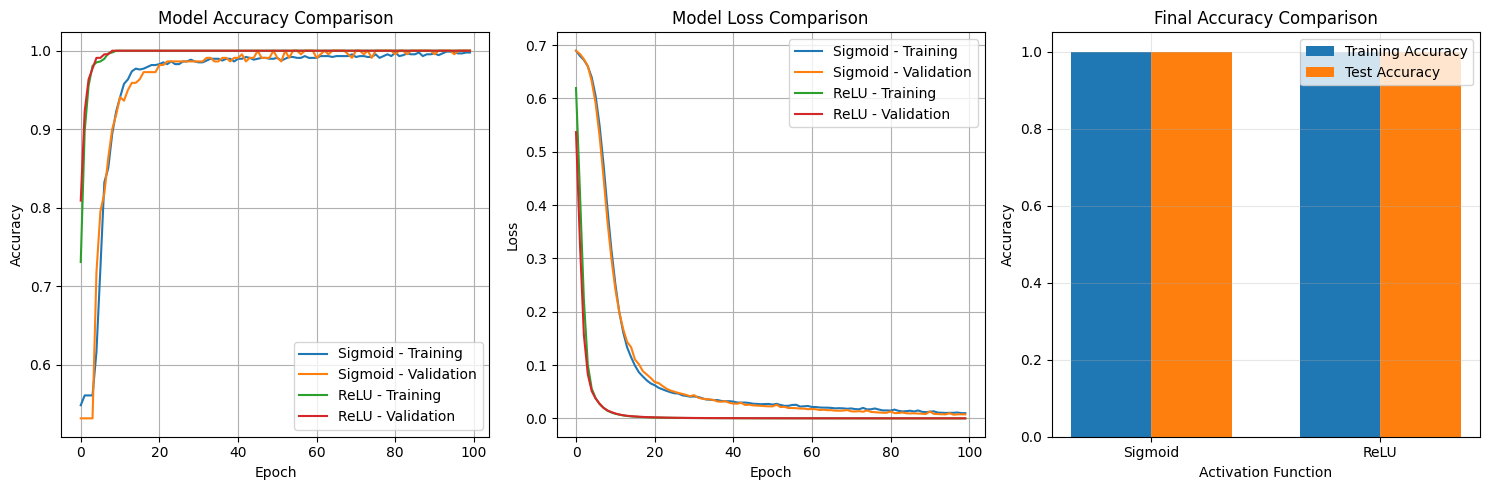

In [37]:
# Plot training history comparison
plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 3, 1)
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid - Training')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid - Validation')
plt.plot(history_relu.history['accuracy'], label='ReLU - Training')
plt.plot(history_relu.history['val_accuracy'], label='ReLU - Validation')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss comparison
plt.subplot(1, 3, 2)
plt.plot(history_sigmoid.history['loss'], label='Sigmoid - Training')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid - Validation')
plt.plot(history_relu.history['loss'], label='ReLU - Training')
plt.plot(history_relu.history['val_loss'], label='ReLU - Validation')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Bar chart for final accuracies
plt.subplot(1, 3, 3)
models = ['Sigmoid', 'ReLU']
train_accs = [sigmoid_train_accuracy, relu_train_accuracy]
test_accs = [sigmoid_test_accuracy, relu_test_accuracy]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_accs, width, label='Training Accuracy')
plt.bar(x + width/2, test_accs, width, label='Test Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Final Accuracy Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Performance Analysis: Sigmoid vs ReLU

**Key Observations:**

1. **Training Speed:** ReLU typically converges faster than Sigmoid due to:
   - No vanishing gradient problem
   - Computational simplicity (max(0,x))
   - Linear behavior for positive inputs

2. **Accuracy:** Both activation functions can achieve high accuracy on this dataset:
   - ReLU often shows more stable training
   - Sigmoid may show slower initial convergence

3. **Gradient Flow:** 
   - ReLU: Gradients flow freely for positive inputs
   - Sigmoid: Can suffer from vanishing gradients in deep networks

4. **Practical Considerations:**
   - ReLU is generally preferred for hidden layers
   - Sigmoid is still useful for output layers in binary classification
   - ReLU is computationally more efficient